In [2]:
#Importar librerías
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

#Conectar con los datos

# Definir la ruta de la carpeta donde están los archivos CSV
carpeta_csv = 'C:/Users/Administrator/Desktop/Proyecto(Kaggle)_Aprendizaje supervisado,Clasificación/RetoSpaceshipTitanic/Data'

# Crear una lista para almacenar los DataFrames
dataframes = []

# Recorrer todos los archivos en la carpeta
for archivo in os.listdir(carpeta_csv):
    # Verificar que el archivo es un CSV
    if archivo.endswith(".csv"):
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(carpeta_csv, archivo)
        
        # Cargar el archivo CSV y añadirlo a la lista
        df = pd.read_csv(ruta_completa)
        dataframes.append(df)

# Verificar cuántos DataFrames fueron cargados
print(f"Se cargaron {len(dataframes)} archivos CSV.")


Se cargaron 3 archivos CSV.


EDA

In [3]:
# Acceder a los DataFrames por índice
df_submission = dataframes[0]  # Primer archivo (formato de predicciones)
df_test = dataframes[1]   # Segundo archivo (test)
df = dataframes[2]  # Tercer archivo (entrenamiento)


In [4]:
# Mostrar el tamaño de los DataFrames
print(df.shape)

# Obtener una descripción general de los datos (tipos de datos, valores nulos, etc.)
print(df.info())

(8693, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [5]:
print(df.columns)


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


In [6]:
# Resumen estadístico de variables numéricas
print(df.describe())


               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [7]:
# Comprobar valores nulos
print('Valores nulos en df:\n',df.isnull().sum())


Valores nulos en df:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [8]:
df = df.drop(['Name'], axis=1)
df_test= df_test.drop(['Name'], axis=1)

In [9]:
# Comprobar filas duplicadas
print('Valores filas duplicadas en df:\n',df.duplicated().sum())


Valores filas duplicadas en df:
 0


In [10]:
# Ver la frecuencia de las categorías
for col in df.select_dtypes(include='object').columns:
    print(f"Frecuencia de la columna en df:{col}:")
    print(df[col].value_counts())


Frecuencia de la columna en df:PassengerId:
PassengerId
9280_02    1
0001_01    1
0002_01    1
0003_01    1
0003_02    1
          ..
0008_01    1
0007_01    1
0006_02    1
0006_01    1
0005_01    1
Name: count, Length: 8693, dtype: int64
Frecuencia de la columna en df:HomePlanet:
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
Frecuencia de la columna en df:CryoSleep:
CryoSleep
False    5439
True     3037
Name: count, dtype: int64
Frecuencia de la columna en df:Cabin:
Cabin
G/734/S     8
F/1194/P    7
B/201/P     7
G/981/S     7
G/109/P     7
           ..
E/56/P      1
A/98/P      1
G/1499/S    1
G/1500/S    1
D/252/P     1
Name: count, Length: 6560, dtype: int64
Frecuencia de la columna en df:Destination:
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64
Frecuencia de la columna en df:VIP:
VIP
False    8291
True      199
Name: count, dtype: int64


In [11]:
# Convertir las columnas categóricas a variables dummy (One-Hot Encoding)
df_encoded = pd.get_dummies(df)
df_test= pd.get_dummies(df_test)

In [12]:
print(df_encoded.columns)


Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'PassengerId_0001_01', 'PassengerId_0002_01',
       'PassengerId_0003_01',
       ...
       'Cabin_T/0/P', 'Cabin_T/1/P', 'Cabin_T/2/P', 'Cabin_T/2/S',
       'Cabin_T/3/P', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True'],
      dtype='object', length=15270)


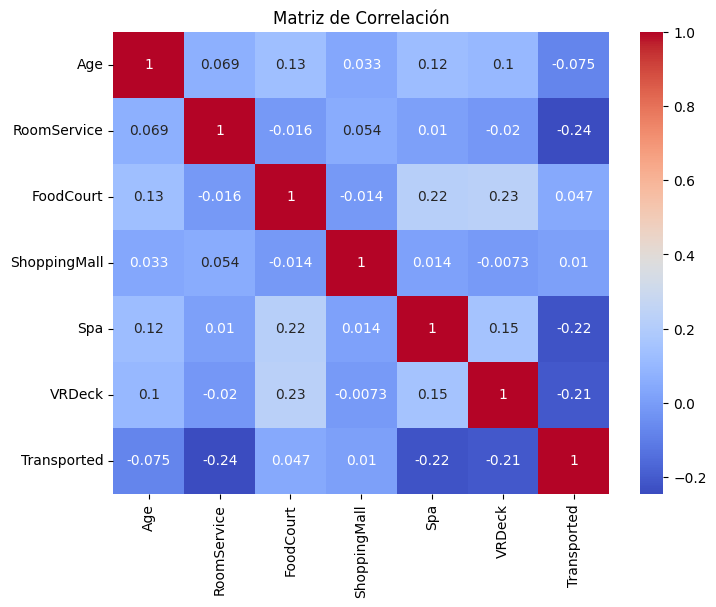

In [13]:
df_reduced = df_encoded[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported']]  # Seleccionar solo algunas columnas
correlation_matrix = df_reduced.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()



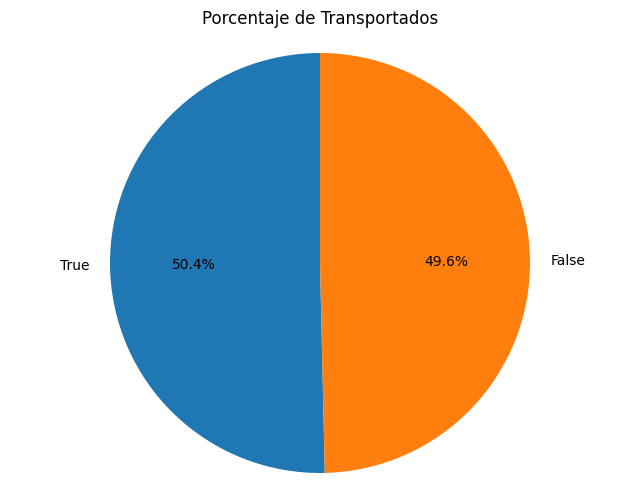

In [14]:
conteo = df['Transported'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Transportados')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()



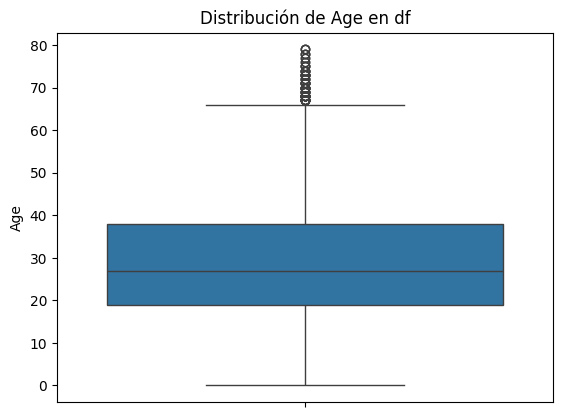

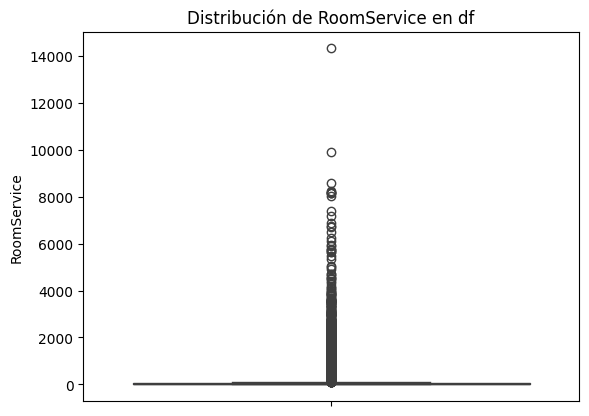

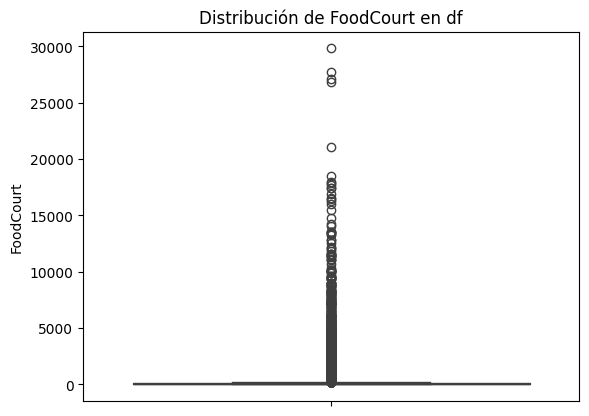

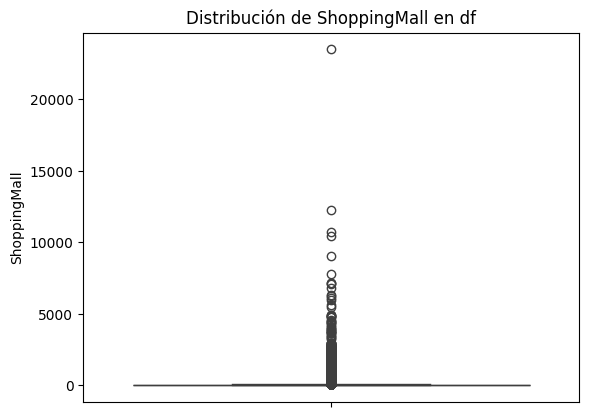

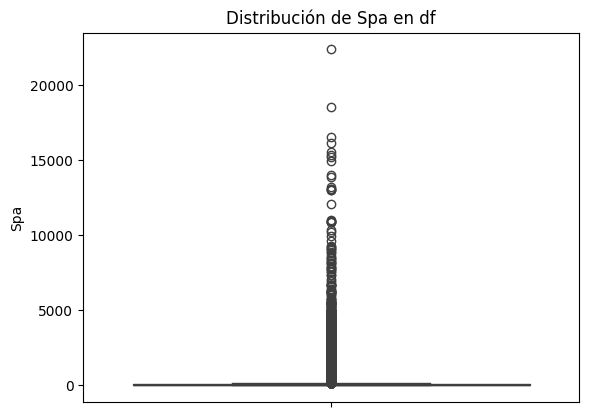

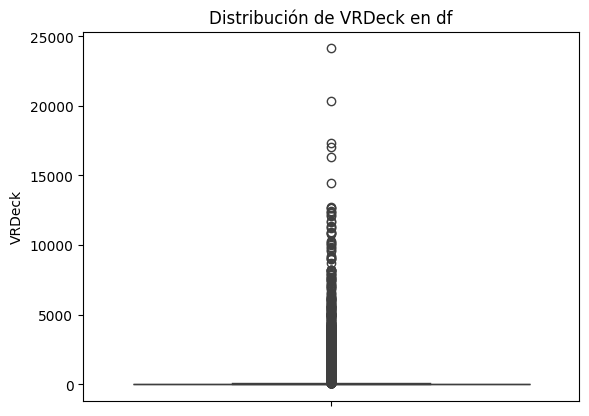

In [15]:
# Graficar distribuciones y detectar outliers
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(df[col])
    plt.title(f"Distribución de {col} en df")
    plt.show()


Entrenamiento del Módelo

In [16]:
# Importar LazyClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Dividir el dataset en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(columns=['Transported']), df['Transported'], test_size=0.3, random_state=42)

# Crear el modelo LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Entrenar y obtener los resultados
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Mostrar los resultados
print(models)


100%|██████████| 31/31 [00:11<00:00,  2.78it/s]

[LightGBM] [Info] Number of positive: 3059, number of negative: 3026
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1355
[LightGBM] [Info] Number of data points in the train set: 6085, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502712 -> initscore=0.010846
[LightGBM] [Info] Start training from score 0.010846
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.79               0.79     0.79      0.79   
SVC                                0.78               0.78     0.78      0.78   
NuSVC                              0.78               0.78     0.78      0.78   
AdaBoostClassifier                 0.78               0.78     0.78      0.78   
RandomForestClassifier    

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Separar características (X) y la columna objetivo (y)
X = df_encoded.drop(columns=['Transported'])  # Elimina la columna objetivo
y = df_encoded['Transported']  # Columna objetivo

# Dividir el conjunto de datos para realizar pruebas antes de la optimización
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
model = RandomForestClassifier()

# Definir el rango de hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Configurar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Entrenar el modelo y hacer la búsqueda
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)






Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
# Hacer predicciones sobre el conjunto de validación
predicciones_val = grid_search.best_estimator_.predict(X_test)

# Evaluar el rendimiento del modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, predicciones_val))
print("Reporte de clasificación:")
print(classification_report(y_test, predicciones_val))

# Matriz de confusión
cm = confusion_matrix(y_test, predicciones_val)
print("Matriz de confusión:\n", cm)

In [ ]:
# Asegurarse de que las características coincidan con las del modelo entrenado
expected_features = grid_search.best_estimator_.feature_names_in_

# Filtrar las columnas de df_test_encoded para que coincidan con las esperadas
X_test_filtered = df_test_encoded.reindex(columns=expected_features, fill_value=0)

# Hacer predicciones
predicciones_test = grid_search.best_estimator_.predict(X_test_filtered)

# Crear un DataFrame de resultados
resultado_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],  # Asegúrate de que esta columna esté en df_test
    'Transported': predicciones_test
})

# Guardar el resultado en un archivo CSV
resultado_df.to_csv('RF_sample_submission.csv', index=False)

print("Predicciones guardadas en 'RF_sample_submission.csv")